In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from math import sin, cos, pi, sqrt, exp

#### TASK #1

In [2]:
enter_function = input('Input funtion:')

Input funtion:


In [3]:
enter_analytic_function = input('Input analytic funtion:')

Input analytic funtion:


In [4]:
def execute_function(x):
    #return eval(str(enter_function))
    #return x**5 + 2*x**3 - 5*x + 6
    return sin(x)

def execute_analytic_function(x):
    #return eval(str(enter_analytic_function))
    #return -1/210 * x * (-5661 + 630 * x - 175 * x**2 + 21 * x** 4 + 5* x**6)
    return sin(x) - sin(100) / 100 * x
    
l = 100
n = 1000

In [5]:
h = l/n

x = [i * h for i in range(n + 1)]

eigen_values = [(4 / (h ** 2)) * (sin(pi * k * h / (2 * l))) ** 2 for k in range(1, n)]

eigen_vectors = []

for k in range(1, n):
    vector = []
    for i in range(1, n):
        vector.append(sqrt(2 / l) * sin(pi * k * x[i] / l))
    eigen_vectors.append(vector)

In [6]:
F = []
C = []
for k in range(n - 1):
    f = 0
    for j in range(n - 1):
        f += execute_function(x[j]) * eigen_vectors[k][j] * h

    F.append(f)
    C.append(f / eigen_values[k])

In [7]:
y = []
for i in range(n - 1):
    y_i = 0
    for k in range(n - 1):
        y_i += C[k] * eigen_vectors[k][i]
    y.append(y_i)

In [8]:
analytic = []
for i in range(len(x) - 2):
    analytic.append(execute_analytic_function(x[i]))

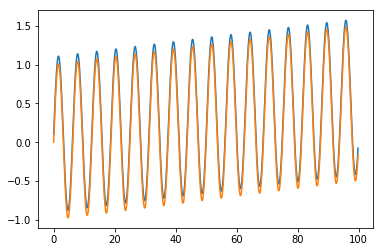

In [9]:
plt.plot(x[:-2], y)
plt.plot(x[:-2], analytic)
plt.show()

#### TASK #2

In [10]:
enter_function = input('Input funtion:')

Input funtion:


In [11]:
enter_q_function = input('Input q funtion:')

Input q funtion:


In [12]:
def execute_f_function(x):
    #return eval(str(enter_function))
    return -sin(x * pi)


def execute_q_function(x):
    #return eval(str(enter_q_function ))
    return exp(x)

In [13]:
k = 0.2
beta = 3
gamma1 = 1.2
gamma2 = 2.1
l = 3
n = 200

In [14]:
def solve_boundary_value_problem(method):

    h = l / n
    x = [h * i for i in range(n + 1)]

    a_diagonal = list()  # diagonal below the main
    b_diagonal = list()  # main diagonal
    c_diagonal = list()  # diagonal above the main
    f = list()  # d coefficients

    a_diagonal.append(0)
    c_diagonal.append(-k / h)
    if method == "with approximation":
        b_diagonal.append(k / h + beta + h * execute_q_function(x[0])/2)
        f.append(gamma1 + h * execute_f_function(x[0]))
    elif method == "without approximation":
        b_diagonal.append(k / h + beta)
        f.append(gamma1)

    element = k / (h ** 2)

    for i in range(1, n):
        a_diagonal.append(element)
        b_diagonal.append(-2 * k / (h ** 2) - execute_q_function(x[i]))
        c_diagonal.append(element)
        f.append(-execute_f_function(x[i]))

    a_diagonal.append(0)
    b_diagonal.append(1)
    c_diagonal.append(0)
    f.append(gamma2)

    # Tridiagonal matrix algorithm
    c = list()
    d = list()

    c.append(-c_diagonal[0] / b_diagonal[0])
    d.append(execute_f_function(x[0]) / b_diagonal[0])

    for i in range(n + 1):
        c.append(-c_diagonal[i] / (b_diagonal[i] + a_diagonal[i] * c[i]))
        d.append((-a_diagonal[i] * d[i] + f[i]) / (b_diagonal[i] + a_diagonal[i] * c[i]))

    y = [0 for i in range(n)]

    y[-1] = d[-1]

    for i in reversed(range(n - 1)):
        y[i] = c[i + 1] * y[i + 1] + d[i + 1]

    return x[:-1], y

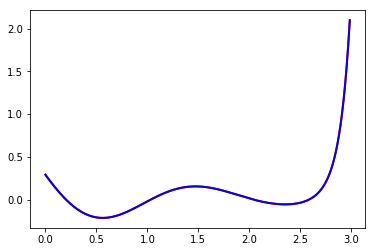

In [15]:
x1, y1 = solve_boundary_value_problem('without approximation')
x2, y2 = solve_boundary_value_problem('with approximation')
plt.plot(x1, y1, linewidth=2, color='red')
plt.plot(x2, y2, linewidth=2, color='blue')
plt.show()